<a href="https://colab.research.google.com/github/Catherinelapir/Final-year-project-image-segmentation-model/blob/main/Final_Year_Project_Claire_resnet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
_from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K
import natsort

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array, array_to_img

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential

In [ ]:
input_dir1 = "/content/drive/MyDrive/image_copy/image_copy1/"
combined_mask_dir1="/content/drive/MyDrive/mask_copy/content/combined_masks/"

input_dir2 = "/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/"
combined_mask_dir2 = "/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/"


input_dir4 = "/content/drive/MyDrive/image_copy/augmented_image_rotated/"
combined_mask_dir4 = "/content/drive/MyDrive/mask_copy/content/augmented_rotated_masks/"

input_dir5 = "/content/drive/MyDrive/image_copy/augmented_image_zoom/"
combined_mask_dir5 = "/content/drive/MyDrive/mask_copy/content/augmented_mask_zoomed/"

input_dir6 = "/content/drive/MyDrive/image_copy/augmented_image_shift_width/"
combined_mask_dir6 = "/content/drive/MyDrive/mask_copy/content/augmented_mask_width_shifted/"


In [ ]:
test_dir_img = "/content/drive/MyDrive/image_copy/image_test/"
test_dir_mask = "/content/drive/MyDrive/mask_copy/content/mask_test/"

In [ ]:
input_test_img_paths = natsort.natsorted(
    [
        os.path.join(test_dir_img, fname)
        for fname in os.listdir(test_dir_img)
        if fname.endswith(".jpg")
    ]
)

input_test_img_paths[16:20]

['/content/drive/MyDrive/image_copy/image_test/image_25.jpg',
 '/content/drive/MyDrive/image_copy/image_test/image_26.jpg',
 '/content/drive/MyDrive/image_copy/image_test/image_27.jpg',
 '/content/drive/MyDrive/image_copy/image_test/image_28.jpg']

In [ ]:
input_test_mask_paths = natsort.natsorted(
    [
        os.path.join(test_dir_mask, fname)
        for fname in os.listdir(test_dir_mask)
        if fname.endswith(".jpg")
    ]
)

input_test_mask_paths[16:20]

['/content/drive/MyDrive/mask_copy/content/mask_test/mask_25.jpg',
 '/content/drive/MyDrive/mask_copy/content/mask_test/mask_26.jpg',
 '/content/drive/MyDrive/mask_copy/content/mask_test/mask_27.jpg',
 '/content/drive/MyDrive/mask_copy/content/mask_test/mask_28.jpg']

In [ ]:
input_img_paths1 = natsort.natsorted(
    [
        os.path.join(input_dir1, fname)
        for fname in os.listdir(input_dir1)
        if fname.endswith(".jpg")
    ]
)

input_img_paths1[16:20]

['/content/drive/MyDrive/image_copy/image_copy1/image_40.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1/image_41.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1/image_42.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1/image_43.jpg']

In [ ]:
combined_mask_paths1 =natsort.natsorted(
    [
        os.path.join(combined_mask_dir1, fname)
        for fname in os.listdir(combined_mask_dir1)
        if fname.endswith(".jpg")
    ]
)

combined_mask_paths1[16:20]

['/content/drive/MyDrive/mask_copy/content/combined_masks/mask_40.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks/mask_41.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks/mask_42.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks/mask_43.jpg']

In [ ]:
input_img_paths2 = natsort.natsorted(
    [
        os.path.join(input_dir2, fname)
        for fname in os.listdir(input_dir2)
        if fname.endswith(".jpg")
    ]
)

input_img_paths2[16:20]

['/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_40.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_41.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_42.jpg',
 '/content/drive/MyDrive/image_copy/image_copy1_augmented_vertically/image_43.jpg']

In [ ]:
combined_mask_paths2 = natsort.natsorted(
    [
        os.path.join(combined_mask_dir2, fname)
        for fname in os.listdir(combined_mask_dir2)
        if fname.endswith(".jpg")
    ]
)

combined_mask_paths2[16:20]

['/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_40.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_41.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_42.jpg',
 '/content/drive/MyDrive/mask_copy/content/combined_masks_augmented_vertically/mask_43.jpg']

In [ ]:
input_img_paths4 = natsort.natsorted(
    [
        os.path.join(input_dir4, fname)
        for fname in os.listdir(input_dir4)
        if fname.endswith(".jpg")
    ]
)

input_img_paths4[16:20]

['/content/drive/MyDrive/image_copy/augmented_image_rotated/image_40.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_rotated/image_41.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_rotated/image_42.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_rotated/image_43.jpg']

In [ ]:
combined_mask_paths4 = natsort.natsorted(
    [
        os.path.join(combined_mask_dir4, fname)
        for fname in os.listdir(combined_mask_dir4)
        if fname.endswith(".jpg")
    ]
)

combined_mask_paths4[16:20]

['/content/drive/MyDrive/mask_copy/content/augmented_rotated_masks/mask_40.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_rotated_masks/mask_41.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_rotated_masks/mask_42.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_rotated_masks/mask_43.jpg']

In [ ]:
input_img_paths5 = natsort.natsorted(
    [
        os.path.join(input_dir5, fname)
        for fname in os.listdir(input_dir5)
        if fname.endswith(".jpg")
    ]
)

input_img_paths5[16:20]

['/content/drive/MyDrive/image_copy/augmented_image_zoom/image_40.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_zoom/image_41.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_zoom/image_42.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_zoom/image_43.jpg']

In [ ]:
combined_mask_paths5 = natsort.natsorted(
    [
        os.path.join(combined_mask_dir5, fname)
        for fname in os.listdir(combined_mask_dir5)
        if fname.endswith(".jpg")
    ]
)

combined_mask_paths5[16:20]

['/content/drive/MyDrive/mask_copy/content/augmented_mask_zoomed/mask_40.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_zoomed/mask_41.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_zoomed/mask_42.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_zoomed/mask_43.jpg']

In [ ]:
input_img_paths6 = natsort.natsorted(
    [
        os.path.join(input_dir6, fname)
        for fname in os.listdir(input_dir6)
        if fname.endswith(".jpg")
    ]
)

input_img_paths6[16:20]

['/content/drive/MyDrive/image_copy/augmented_image_shift_width/image_40.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_shift_width/image_41.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_shift_width/image_42.jpg',
 '/content/drive/MyDrive/image_copy/augmented_image_shift_width/image_43.jpg']

In [ ]:
combined_mask_paths6 = natsort.natsorted(
    [
        os.path.join(combined_mask_dir6, fname)
        for fname in os.listdir(combined_mask_dir6)
        if fname.endswith(".jpg")
    ]
)

combined_mask_paths6[16:20]

['/content/drive/MyDrive/mask_copy/content/augmented_mask_width_shifted/mask_40.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_width_shifted/mask_41.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_width_shifted/mask_42.jpg',
 '/content/drive/MyDrive/mask_copy/content/augmented_mask_width_shifted/mask_43.jpg']

In [ ]:
combined_images = input_img_paths1 + input_img_paths2  + input_img_paths4 + input_img_paths5 + input_img_paths6
combined_masks = combined_mask_paths1 + combined_mask_paths2 + combined_mask_paths4 + combined_mask_paths5 + combined_mask_paths6
print(len(combined_masks))
print(len(combined_images))

1685
1685


In [ ]:
test_image_and_test_mask = {'image_path':input_test_img_paths, 'mask_path':input_test_mask_paths}
df_test = pd.DataFrame(test_image_and_test_mask)
df_test

,image_path,mask_path
0,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
1,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
2,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
3,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
4,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
5,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
6,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
7,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
8,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...
9,/content/drive/MyDrive/image_copy/image_test/i...,/content/drive/MyDrive/mask_copy/content/mask_...


In [ ]:
image_and_mask = {'image_path':combined_images, 'mask_path':combined_masks}
df = pd.DataFrame(image_and_mask)
df

,image_path,mask_path
0,/content/drive/MyDrive/image_copy/image_copy1/...,/content/drive/MyDrive/mask_copy/content/combi...
1,/content/drive/MyDrive/image_copy/image_copy1/...,/content/drive/MyDrive/mask_copy/content/combi...
2,/content/drive/MyDrive/image_copy/image_copy1/...,/content/drive/MyDrive/mask_copy/content/combi...
3,/content/drive/MyDrive/image_copy/image_copy1/...,/content/drive/MyDrive/mask_copy/content/combi...
4,/content/drive/MyDrive/image_copy/image_copy1/...,/content/drive/MyDrive/mask_copy/content/combi...
...,...,...
1680,/content/drive/MyDrive/image_copy/augmented_im...,/content/drive/MyDrive/mask_copy/content/augme...
1681,/content/drive/MyDrive/image_copy/augmented_im...,/content/drive/MyDrive/mask_copy/content/augme...
1682,/content/drive/MyDrive/image_copy/augmented_im...,/content/drive/MyDrive/mask_copy/content/augme...
1683,/content/drive/MyDrive/image_copy/augmented_im...,/content/drive/MyDrive/mask_copy/content/augme...


In [ ]:
IMG_SIZE = [512, 512]

def preprocessing(img_path, mak_path):
    car_img = tf.io.read_file(img_path) 
    car_img = tf.image.decode_jpeg(car_img, channels=3)
    car_img = tf.image.resize(car_img, IMG_SIZE)
    car_img = tf.cast(car_img, tf.float32) / 255.0
    
    mask_img = tf.io.read_file(mak_path)
    mask_img = tf.image.decode_jpeg(mask_img, channels=3)
    mask_img = tf.image.resize(mask_img, IMG_SIZE)
    mask_img = mask_img[:,:,:1]    
    mask_img = tf.math.sign(mask_img)

    return car_img, mask_img

def create_dataset(df, train = False):
    if not train:
        ds = tf.data.Dataset.from_tensor_slices((df["image_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
    else:
        ds = tf.data.Dataset.from_tensor_slices((df["image_path"].values, df["mask_path"].values))
        ds = ds.map(preprocessing, tf.data.AUTOTUNE)
        
        
    return ds

In [ ]:
train_df, valid_df = train_test_split(df, random_state=42, test_size=.3)

In [ ]:
train= create_dataset(train_df, train = True)
#train= create_dataset(y_train, train = True)
valid = create_dataset(valid_df)
test = create_dataset(df_test)

In [ ]:
# train

In [ ]:
# valid

In [ ]:
TRAIN_LENGTH = len(train_df)
BATCH_SIZE = 16
BUFFER_SIZE = 1000

In [ ]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid.batch(BATCH_SIZE)
test_dataset = test.batch(BATCH_SIZE)

In [ ]:
print(train_dataset)
print(valid_dataset)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None))>


In [ ]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None))>

(16, 512, 512, 3)
(16, 512, 512, 1)


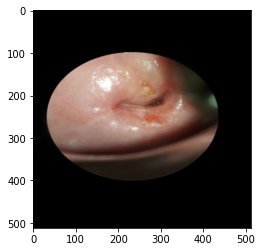

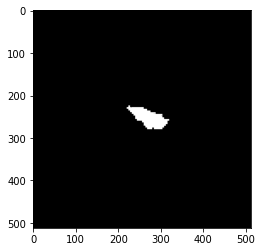

In [ ]:
import random
ind = random.randint(0, 16)
for img, msk in valid_dataset:
    print(img.shape)
    print(msk.shape)
    plt.imshow(img[ind])
    plt.show()
    
    plt.imshow(msk[ind,:,:, 0], cmap='gray')
    plt.show()
    break

#models

RESNET + UNET

In [ ]:
! pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 7.0 MB/s 


In [ ]:
! pip install -U --pre segmentation-models

In [ ]:
! pip install git+https://github.com/qubvel/segmentation_models

In [ ]:
!git clone https://github.com/qubvel/segmentation_models.git

In [ ]:
%cd /content/segmentation_models/segmentation_models

/content/segmentation_models/segmentation_models


In [ ]:
import segmentation_models as sm
import segmentation_models as sm
sm.set_framework('tf.keras')
sm.framework()
n_classes=1
activation='sigmoid'

LR = 0.0001
optim = keras.optimizers.Adam(LR)

JaccardLoss = sm.losses.JaccardLoss()
# dice_loss = sm.losses.DiceLoss() 
def get_config(self):
  # config = super(dice_loss, self).get_config()
  config = super(JaccardLoss, self).get_config()
  # config.update({'dice_loss':self.dice_loss})
  config.update({'JaccardLoss':self.dice_loss})
  return config

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5), sm.metrics.precision, sm.metrics.recall]


########################################################################
###Model 1
decoder_filters=(512, 256, 128, 64, 32)
BACKBONE1 = 'resnet34'
preprocess_input1 = sm.get_preprocessing(BACKBONE1)

# preprocess input
X_train1 = preprocess_input1(train_dataset)
# X_valid1 = preprocess_input1(valid_dataset)

# define model
model1 = sm.Unet(BACKBONE1, input_shape = (512, 512, 3), classes=n_classes, activation=activation, decoder_filters=(512, 256, 128, 64, 32))

# # compile keras model with defined optimozer, loss and metrics
# model = model1
# config = model.get_config()
# # At loading time, register the custom objects with a `custom_object_scope`:
# custom_objects = {"dice_loss": dice_loss}
# with keras.utils.custom_object_scope(custom_objects):
#     model = keras.Model.from_config(config)

model1.compile(optimizer='adam', loss=JaccardLoss, metrics=metrics )
# model1.compile(optim, dice_loss, metrics=metrics)

#model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

print(model1.summary())


Segmentation Models: using `keras` framework.
85532672/85521592 [==============================] - 7s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 data (InputLayer)              [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 bn_data (BatchNormalization)   (None, 512, 512, 3)  9           ['data[0][0]']                   
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 518, 518, 3)  0          ['bn_data[0][0]']                
                                                                                

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 33.9 MB/s 
     |████████████████████████████████| 158 kB 58.9 MB/s 
     |████████████████████████████████| 181 kB 71.5 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 157 kB 60.8 MB/s 
     |████████████████████████████████| 157 kB 79.5 MB/s 
     |████████████████████████████████| 157 kB 78.4 MB/s 
     |████████████████████████████████| 157 kB 60.6 MB/s 
     |████████████████████████████████| 157 kB 75.2 MB/s 
     |████████████████████████████████| 157 kB 63.6 MB/s 
     |████████████████████████████████| 157 kB 73.8 MB/s 
     |████████████████████████████████| 156 kB 77.5 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=f3a0b75da70d202327a1e7e47e0643608734901b8bf5053cf1d10a786c0f5ed7
  Stored in directory: /root/.cache/pip/wheels/3e/31

In [ ]:
import wandb
import tensorflow as tf

In [ ]:
# Log in to your W&B account
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
config = {
  "Backbone": 'Base_line_1',
  "Con2dtranspose_init": 'he_normal',
  "Decoder_block_type": "Conv2DTranspose",
  "decoder_filters":(512,256,128,64, 32),
  'batch_norm': True,
  "Activation": 'relu',
  "batch_size": 1, 
  "verbose": 1,
  "initial_epoch": 0, 
  "epochs": 100,
  "shuffle": True,
  "Dropout": 0.5
}
wandb.init(config = config, project="password", entity="fyp_claire")

config = wandb.config

wandb: Currently logged in as: claire_2022_fyp (fyp_claire). Use `wandb login --relogin` to force relogin


In [ ]:
from wandb.keras import WandbCallback
callbacks = WandbCallback(
                                
                                 loss = JaccardLoss,
                               
                                log_weights=True,
                                log_evaluation=True)

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


In [ ]:
EPOCHS = 100
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

model_history = model1.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=valid_dataset,
                           callbacks=[callbacks]
                        #   allbacks=[
                                    #  DisplayCallback(),
                                    #  early_stop]
                          )

In [ ]:
plt.plot(model_history.history['loss'], color='b', label="Training loss")
plt.plot(model_history.history['val_loss'], color='r', label="Validation loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(model_history.history['f1-score'], color='b', label="Training dice coeff")
plt.plot(model_history.history['val_f1-score'], color='r', label="Validation dice coeff")
plt.legend()
plt.show()

In [ ]:
plt.plot(model_history.history['precision'], color='b', label="Training precision")
plt.plot(model_history.history['val_precision'], color='r', label="Validation precision")
plt.legend()
plt.show()

In [ ]:
plt.plot(model_history.history['iou_score'], color='b', label="Training iou_score")
plt.plot(model_history.history['val_iou_score'], color='r',label="Validation iou_score")
# plt.legend(loc='best', shadow=True)
plt.legend()
plt.show()

In [ ]:
model1.evaluate(valid_dataset)

In [ ]:
# model1.save("/content/drive/MyDrive/Colab_Notebooks/saved_model")
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model1.save('my_model.h5')

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
from keras.saving import saved_model
from keras.models import load_model

new_model = tf.keras.models.load_model('my_model.h5', custom_objects={'JaccardLoss':JaccardLoss}, compile=False)

# Show the model architecture
new_model.summary()

In [ ]:
import random
# ind = random.randint(0,32)
for img, msk in test_dataset:
    for i in range(img.shape[0]):
        plt.figure(figsize=(15, 15))
        title = ['Input Image', 'True Mask', 'Predicted Mask']
        plt.subplot(1, 3, 1)
        plt.title(title[0])
        plt.imshow(img[i])

        plt.subplot(1, 3, 2)
        plt.title(title[1])
        plt.imshow(msk[i,:,:,0], cmap='gray')


        pred = new_model.predict(tf.expand_dims(img[i], axis=0))
        plt.subplot(1, 3, 3)
        plt.imshow(pred[0,:,:,0], cmap='gray')
        plt.title(title[2])

        plt.axis('off')
        plt.show()
    break

    # fig = plt.subplot(1,3)
    # # print(np.max(msk), np.min(msk))
    # # print(msk)
    # plt.imshow(img[ind])
    # plt.show()
    # plt.imshow(msk[ind,:,:,0], cmap='gray')
    # plt.show()
    # pred = model2.predict(tf.expand_dims(img[ind], axis=0))
    # print("pred: ", pred.shape)
    # print("pred type: ", type(pred))
    # plt.imshow(pred[0,:,:,0], cmap='gray')
    